In [ ]:
import numpy as np
import pandas_datareader as pdr

In [ ]:
import yfinance as yf

df = yf.download("TSLA", start="2015-01-01", end="2024-12-31")
df.head()


C:\Users\Divyansh\AppData\Local\Temp\ipykernel_400\2499730030.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [7]:
import pandas as pd
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   2515 non-null   float64
 1   (High, TSLA)    2515 non-null   float64
 2   (Low, TSLA)     2515 non-null   float64
 3   (Open, TSLA)    2515 non-null   float64
 4   (Volume, TSLA)  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,115.564847,118.127021,112.871415,115.578935,1.123238e+08
std,114.104456,116.747743,111.357651,114.169550,7.408058e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.185000,17.480000,16.888333,17.174334,6.681690e+07
50%,28.502001,28.713333,27.333332,28.299999,9.286200e+07
75%,220.178337,225.253334,215.294998,220.825005,1.298032e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [12]:
df.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [ ]:
# df has MultiIndex columns like ('Close', 'TSLA')
df.columns = df.columns.droplevel(1)  # Remove ticker name like 'TSLA'
df.to_csv('AAPL_clean.csv')          


In [14]:
df = pd.read_csv('AAPL_clean.csv', index_col='Date', parse_dates=True)


In [15]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [16]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000


In [24]:
df1 = df.reset_index()['Close']
df1

0        14.620667
1        14.006000
2        14.085333
3        14.063333
4        14.041333
           ...    
2510    430.600006
2511    462.279999
2512    454.130005
2513    431.660004
2514    417.410004
Name: Close, Length: 2515, dtype: float64

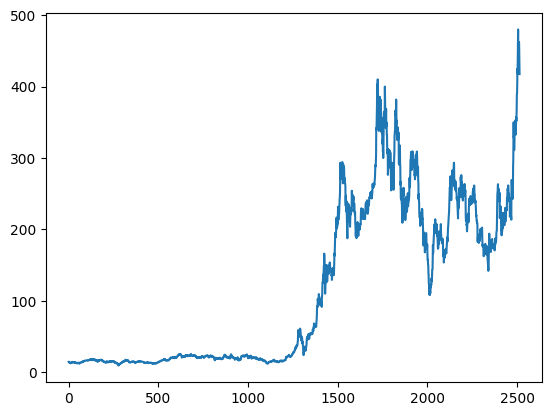

In [26]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [36]:
training_size = int(len(df1) * 0.70)
train_data = df1[0:training_size]
test_data = df1[training_size:]
print(train_data.shape)
print(test_data.shape)


(1760, 1)
(755, 1)


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(np.array(train_data))
test_scaled = scaler.transform(test_data)


In [41]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])

    return np.array(dataX),np.array(dataY)

In [42]:
time_step = 100
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled,time_step)

In [44]:
print(X_train.shape),print(y_train.shape)

(1659, 100)
(1659,)


(None, None)

In [45]:
print(X_test.shape),print(y_test.shape)

(654, 100)
(654,)


(None, None)

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [52]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [53]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0230 - val_loss: 0.0041
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 7.8573e-04 - val_loss: 0.0034
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 9.9466e-04 - val_loss: 0.0032
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 8.0195e-04 - val_loss: 0.0031
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 6.6431e-04 - val_loss: 0.0030
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 6.9411e-04 - val_loss: 0.0025
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 7.9497e-04 - val_loss: 0.0023
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 5.8826e-04 - val_loss: 0.0028
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 6.1647e-04 - val_loss: 0.0023
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 6.8621e-04 - val_loss: 0.0021
Epoch 12/100
26/

In [56]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [57]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [58]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.011694407666159732

In [60]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.022140038063868675

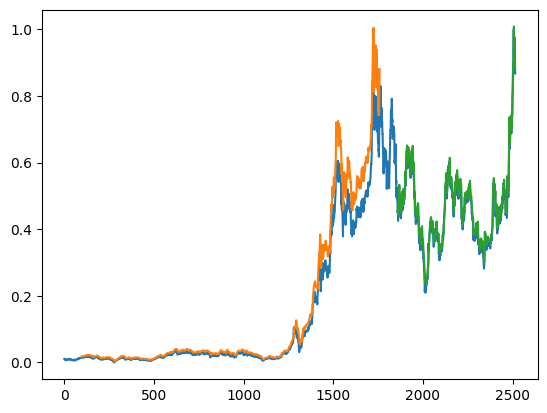

In [61]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
len(test_scaled)

755

In [72]:
x_input=test_scaled[655:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [75]:
temp_input

[0.402443644859957,
 0.40491025786749446,
 0.3995730461830494,
 0.4215598469993098,
 0.4078446779090837,
 0.43497732365387054,
 0.43918755451429353,
 0.45322170064375966,
 0.44977696925305366,
 0.4543912182288888,
 0.42757751707729985,
 0.4481183924763404,
 0.4329998022839592,
 0.42449426704089904,
 0.41713696477939344,
 0.41826394560341557,
 0.434913534735231,
 0.42744993924002067,
 0.446183375421494,
 0.46906325354475087,
 0.42772634707211155,
 0.4395065315535335,
 0.4605577183016907,
 0.46472544484704864,
 0.4682977540750337,
 0.4693184092193092,
 0.46185481372409903,
 0.46417256429078285,
 0.4627478910310953,
 0.49830103094277023,
 0.4862444386292575,
 0.5112294484057468,
 0.5203091163626052,
 0.5261566393961671,
 0.5202027906828586,
 0.5334714048965656,
 0.5359593025076776,
 0.5282830232069322,
 0.5091456013560888,
 0.49136903140025123,
 0.511399563004133,
 0.49173051275455637,
 0.49953433744653897,
 0.49219831978860795,
 0.487350167295747,
 0.4427598961883207,
 0.4456517794688027

In [76]:
#prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8679419]
101
1 day input [0.40491026 0.39957305 0.42155985 0.40784468 0.43497732 0.43918755
 0.4532217  0.44977697 0.45439122 0.42757752 0.44811839 0.4329998
 0.42449427 0.41713696 0.41826395 0.43491353 0.42744994 0.44618338
 0.46906325 0.42772635 0.43950653 0.46055772 0.46472544 0.46829775
 0.46931841 0.46185481 0.46417256 0.46274789 0.49830103 0.48624444
 0.51122945 0.52030912 0.52615664 0.52020279 0.5334714  0.5359593
 0.52828302 0.5091456  0.49136903 0.51139956 0.49173051 0.49953434
 0.49219832 0.48735017 0.4427599  0.44565178 0.4465236  0.45026603
 0.44933041 0.4489264  0.44499261 0.44312138 0.43393538 0.53351397
 0.55203476 0.53783053 0.5314726  0.52728362 0.5109105  0.50906053
 0.49600453 0.51429145 0.59315901 0.61097812 0.66267051 0.72386783
 0.67812929 0.68185046 0.64132159 0.66160731 0.69992473 0.71536229
 0.70692055 0.70183852 0.72931137 0.69960578 0.69884032 0.68748543
 0.71357614 0.73894388 0.72688732 0.74073004 0.76531103 0.80726461
 0.80847666 0.83229212 0.88285752 0.

In [77]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [78]:
len(df1)


2515

2415


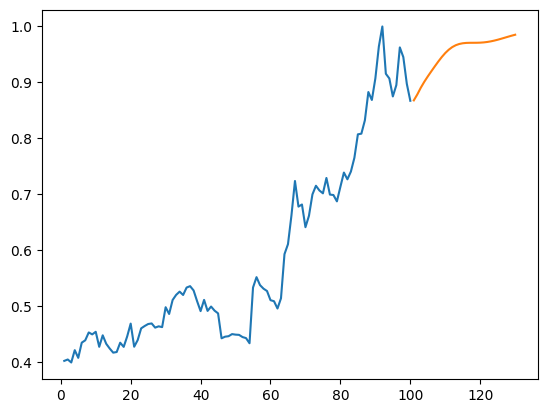

In [79]:
n = len(df1) - 100
print(n)
plt.plot(day_new,scaler.inverse_transform(df1[n:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

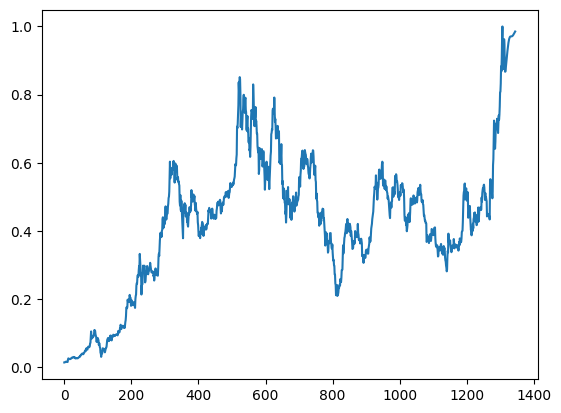

In [80]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

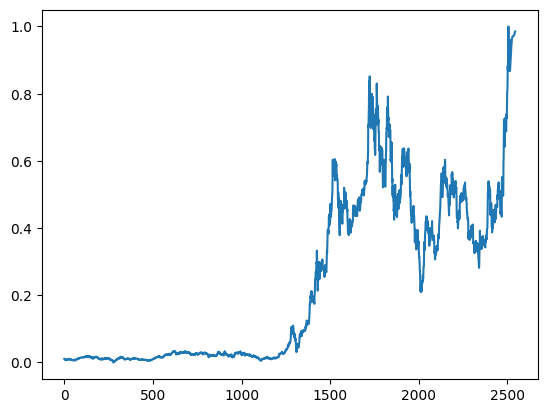

In [81]:

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)